In [1]:
# General imports
import os
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt
from tqdm import tqdm

# Read files
from astropy.table import Table
from astropy.io import fits

# Gaussian
from astropy.modeling.functional_models import Gaussian2D

In [2]:
# Read in Table and sort with highest mag first
hlss_tbl = Table.read("/Users/keith/astr/research_astr/FOV0/catalogs/MOT_SCA1_roll_0_dither_0x_0y_cut_zcut.txt",
                      format='ascii')
hlss_tbl = hlss_tbl.group_by("MODIMAGE")
hlss_tbl.groups[0].sort("MAG_F1500W", reverse=True)
hlss_tbl.groups[1].sort("MAG_F1500W", reverse=True)

# Store len and instantiate empty direct image
total_obj = len(hlss_tbl)
direct_img = np.zeros((4088,4088))

In [3]:
file = fits.open("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits/GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits")
data = file[1].data
file.close()

In [4]:
hlss_tbl[(abs(hlss_tbl["X_IMAGE"] - 1615) < 5) & (abs(hlss_tbl["Y_IMAGE"] - 3187) < 5)].pprint_all()

print('', "object 1:", "--------", '', sep="\n")

object = hlss_tbl[hlss_tbl["NUMBER"] == 184388]
object.pprint_all()

print('', "object 2:", "--------", '', sep="\n")

object_2 = hlss_tbl[hlss_tbl["NUMBER"] == 159373]
object_2.pprint_all()


NUMBER  X_IMAGE   Y_IMAGE  A_IMAGE B_IMAGE THETA_IMAGE MAG_F1500W SPECTEMP    Z     MODIMAGE MODIMAGE_1 MODIMAGE_2
------ --------- --------- ------- ------- ----------- ---------- -------- -------- -------- ---------- ----------
159373 1616.2425 3188.1764  3.6089  3.0504      141.09      19.72   159373 0.462383        0  9.4713958 -0.7008566

object 1:
--------

NUMBER  X_IMAGE   Y_IMAGE  A_IMAGE B_IMAGE THETA_IMAGE MAG_F1500W SPECTEMP    Z     MODIMAGE MODIMAGE_1 MODIMAGE_2
------ --------- --------- ------- ------- ----------- ---------- -------- -------- -------- ---------- ----------
184388 1595.6251 3193.4387  6.6648  5.1421      244.59      18.92   184388 0.460768        0  9.4720241 -0.7006957

object 2:
--------

NUMBER  X_IMAGE   Y_IMAGE  A_IMAGE B_IMAGE THETA_IMAGE MAG_F1500W SPECTEMP    Z     MODIMAGE MODIMAGE_1 MODIMAGE_2
------ --------- --------- ------- ------- ----------- ---------- -------- -------- -------- ---------- ----------
159373 1616.2425 3188.1764  3.6089  3.

In [5]:
7./3 - 4./3 -1
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [14]:
f158_lam_center = 1.577 * 10**-6
A = 2.36**2 * constants.pi

N = lambda mag: A * (f158_lam_center / (constants.h * constants.speed_of_light)) * f_0 * 10**(-0.4 * mag)

amplitude = lambda x_stddev, y_stddev, volume: volume / (2 * constants.pi * x_stddev * y_stddev)

In [15]:
amp = amplitude(object_2["B_IMAGE"], object_2["A_IMAGE"], N(19.72))
amp

9.631907334741832


In [8]:
# y_stddev = object["A_IMAGE"].value[0]
# x_stddev = object["B_IMAGE"].value[0]

# ii=3.70e-10
# while ii < 3.71e-10 and amp != 6.464221091126405:
    
#     volume = N(18.92, ii)
#     amp = amplitude(x_stddev, y_stddev, volume)

#     print("f_0: {0}".format(ii), "amplitude: {0}".format(amp))
#     ii += 2.220446049250313e-16

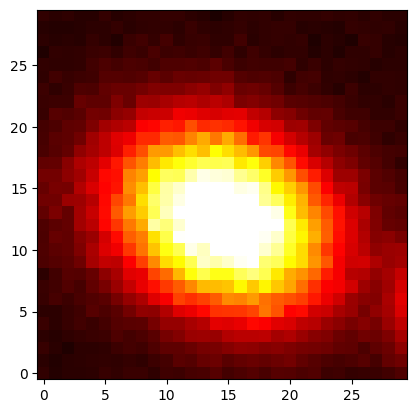

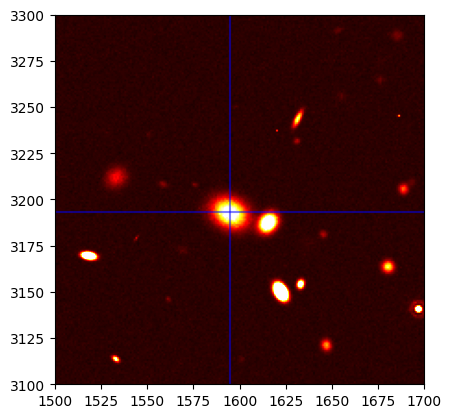

In [9]:
plt.imshow(data[3180:3210, 1580:1610], origin='lower', cmap='hot', vmin=0, vmax=5)
plt.show()

plt.imshow(data, origin='lower', cmap='hot', vmin=0, vmax=5)
plt.ylim(3100, 3300)
plt.xlim(1500, 1700)
plt.axvline(1595, c='b', alpha=0.5)
plt.axhline(3193, c='b', alpha=0.5)
plt.show()

max: 6.438921053958943


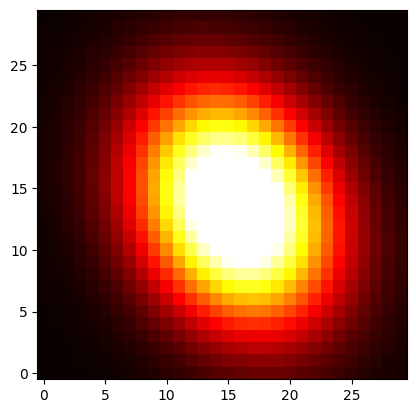

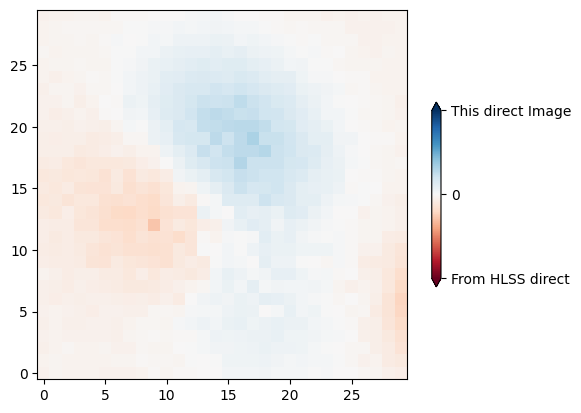

In [10]:
# amplitude = amplitude_func(object["MAG_F1500W"])
amp = 6.464221091126405
y_mean = object["X_IMAGE"]
x_mean = object["Y_IMAGE"]
y_stddev = object["A_IMAGE"]
x_stddev = object["B_IMAGE"]
theta = object["THETA_IMAGE"].value[0] * (np.pi / 180)

args = (amp, x_mean, y_mean, x_stddev, y_stddev, theta)

direct_data = np.fromfunction(lambda i,j: Gaussian2D.evaluate(i, j, *args),
                              shape=(4088,4088))

print("max:", direct_data.max())

plt.imshow(direct_data[3180:3210, 1580:1610], origin='lower', cmap='hot', vmin=0, vmax=5)
plt.show()


difference = direct_data[3180:3210, 1580:1610] - data[3180:3210, 1580:1610]
dif = plt.imshow(difference/direct_data.max(), origin='lower', vmin=-1, vmax=1, cmap=plt.cm.RdBu)

cb = plt.colorbar(dif, shrink = 0.5, extend="both")
cb.set_ticks([1, 0, -1], labels=['This direct Image', 0, 'From HLSS direct'])

plt.show()

max: 9.377985954284668


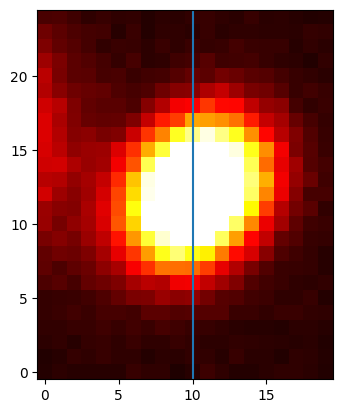

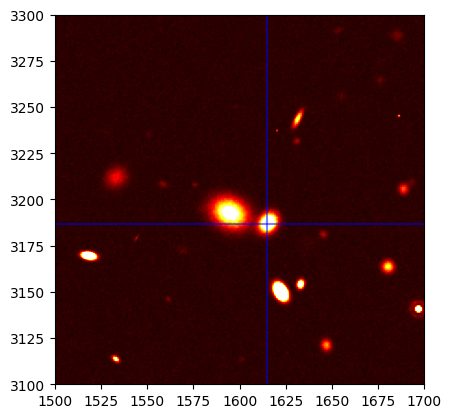

In [11]:
print("max: {0}".format(data[3175:3200, 1605:1625].max()))

plt.imshow(data[3175:3200, 1605:1625], origin='lower', cmap='hot', vmin=0, vmax=5)
plt.axvline(10)
plt.show()

plt.imshow(data, origin='lower', cmap='hot', vmin=0, vmax=5)
plt.ylim(3100, 3300)
plt.xlim(1500, 1700)
plt.axvline(1615, c='b', alpha=0.5)
plt.axhline(3187, c='b', alpha=0.5)
plt.show()

max: 9.377985954284668


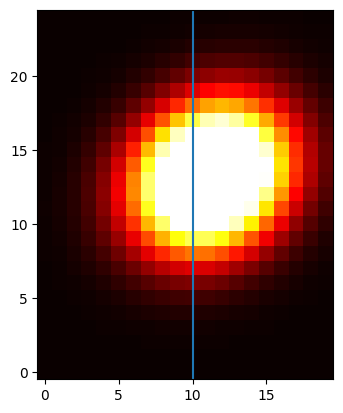

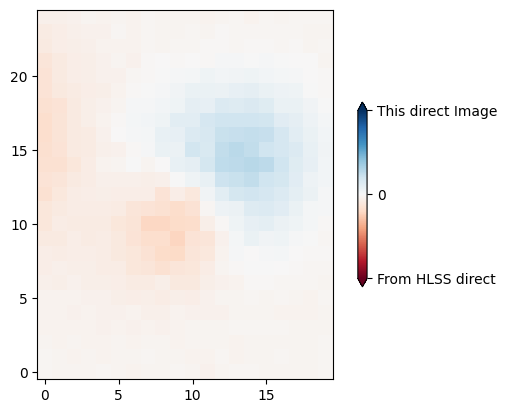

In [12]:
# amplitude = amplitude_func(object["MAG_F1500W"])
amp = 9.4104490088820531 # 9.377985954284668
y_mean = object_2["X_IMAGE"]
x_mean = object_2["Y_IMAGE"]
y_stddev = object_2["A_IMAGE"]
x_stddev = object_2["B_IMAGE"]
theta = object_2["THETA_IMAGE"].value[0] * (np.pi / 180)

args = (amp, x_mean, y_mean, x_stddev, y_stddev, theta)

direct_data_2 = np.fromfunction(lambda i,j: Gaussian2D.evaluate(i, j, *args),
                              shape=(4088,4088))

print("max:", direct_data_2.max())

plt.imshow(direct_data_2[3175:3200, 1605:1625], origin='lower', cmap='hot', vmin=0, vmax=5)
plt.axvline(10)
plt.show()


difference_2 = direct_data_2[3175:3200, 1605:1625] - data[3175:3200, 1605:1625]
dif_2 = plt.imshow(difference_2/direct_data_2.max(), origin='lower', vmin=-1, vmax=1, cmap=plt.cm.RdBu)

cb = plt.colorbar(dif_2, shrink = 0.5, extend="both")
cb.set_ticks([1, 0, -1], labels=['This direct Image', 0, 'From HLSS direct'])

plt.show()